In [5]:
#-------------------------------
# Dependencies and Setup
#-------------------------------

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


#-------------------------------
# Dependencies and Setup
#-------------------------------

arrest_data = "Resources/NYPD_Arrest_Data_2023.csv"


#-------------------------------
# Create Dataframes
#-------------------------------

pop_df = pd.read_csv('resources/NYC_Bor_pop.csv')
arrest_df = pd.read_csv(arrest_data)
MentFac_df = pd.read_csv('resources/Ment_Fac_Bor.csv')

In [6]:
#-------------------------------
# Replace all Borough values with actual names instead of letters
#-------------------------------
arrest_df['ARREST_BORO'] = arrest_df['ARREST_BORO'].replace(['B', 'K', 'M', 'Q', 'S'], ['Bronx', 'Brooklyn', 'Manhatten', 'Queens', 'Staten Island'])

#-------------------------------
# Renamed Borough column
#-------------------------------
arrest_df = arrest_df.rename(columns={'ARREST_BORO':'Borough'})
arrest_df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,Borough,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Brooklyn,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,Brooklyn,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Brooklyn,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Manhatten,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,Brooklyn,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042


In [23]:
#-------------------------------
# Categorized all offenses into more broad categorizes
#-------------------------------

arrest_df['OFNS_DESC'] = arrest_df['OFNS_DESC'].replace(['FELONY ASSAULT', 'DANGEROUS DRUGS', 'RAPE', 'FORGERY', 'BURGLARY',
       'ARSON', 'ASSAULT 3 & RELATED OFFENSES', 'ROBBERY',
       'PETIT LARCENY', 'DANGEROUS WEAPONS', 'MISCELLANEOUS PENAL LAW',
       'HARRASSMENT 2', 'OFF. AGNST PUB ORD SENSBLTY &', 'JOSTLING',
       'SEX CRIMES', '(null)', 'FRAUDS', 'ESCAPE 3', "BURGLAR'S TOOLS",
       'VEHICLE AND TRAFFIC LAWS', 'OFFENSES AGAINST THE PERSON',
       'OFFENSES INVOLVING FRAUD', 'INTOXICATED & IMPAIRED DRIVING',
       'FOR OTHER AUTHORITIES', 'OTHER OFFENSES RELATED TO THEF',
       'POSSESSION OF STOLEN PROPERTY', 'OTHER TRAFFIC INFRACTION',
       'GRAND LARCENY', 'CRIMINAL MISCHIEF & RELATED OF',
       'OTHER STATE LAWS (NON PENAL LA',
       'PROSTITUTION & RELATED OFFENSES', 'GAMBLING', 'CRIMINAL TRESPASS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'MURDER & NON-NEGL. MANSLAUGHTE',
       'OTHER STATE LAWS', 'CANNABIS RELATED OFFENSES',
       'NYS LAWS-UNCLASSIFIED FELONY', 'OFFENSES AGAINST PUBLIC SAFETY',
       'GRAND LARCENY OF MOTOR VEHICLE', 'UNAUTHORIZED USE OF A VEHICLE',
       'ADMINISTRATIVE CODE', 'OFFENSES RELATED TO CHILDREN',
       'THEFT-FRAUD', 'INTOXICATED/IMPAIRED DRIVING',
       'ANTICIPATORY OFFENSES', 'FRAUDULENT ACCOSTING',
       'THEFT OF SERVICES', 'ENDAN WELFARE INCOMP',
       'OTHER STATE LAWS (NON PENAL LAW)',
       'ALCOHOLIC BEVERAGE CONTROL LAW', 'MOVING INFRACTIONS',
       'DISORDERLY CONDUCT', 'KIDNAPPING & RELATED OFFENSES',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'PARKING OFFENSES',
       'CHILD ABANDONMENT/NON SUPPORT', 'KIDNAPPING',
       'UNLAWFUL POSS. WEAP. ON SCHOOL', 'DISRUPTION OF A RELIGIOUS SERV',
       'HOMICIDE-NEGLIGENT-VEHICLE', 'FELONY SEX CRIMES',
       'ADMINISTRATIVE CODES'], ['Crimes Against a Person', 'Crimes Against Morality', 'Crimes Against a Person', 'Crimes Against Property', 'Crimes Against a Person',
       'Crimes Against Property', 'Crimes Against a Person', 'Crimes Against a Person',
       'Crimes Against Property', 'Inchoate Crimes', 'Crimes Against a Person',
       'Crimes Against a Person', 'Crimes Against Morality', 'Crimes Against a Person',
       'Crimes Against a Person', '(null)', 'Financial Crimes', 'Crimes Against Morality', "Crimes Against Property",
       'Statutory Crimes', 'Crimes Against a Person',
       'Financial Crimes', 'Statutory Crimes',
       'Crimes Against a Person', 'Crimes Against Property',
       'Crimes Against Property', 'Statutory Crimes',
       'Crimes Against Property', 'Crimes Against Property',
       'Crimes Against a Person',
       'Crimes Against Morality', 'Crimes Against Morality', 'Crimes Against Property',
       'Statutory Crimes', 'Crimes Against a Person',
       'Crimes Against a Person', 'Crimes Against Morality',
       'Crimes Against a Person', 'Statutory Crimes',
       'Crimes Against Property', 'Statutory Crimes',
       'Crimes Against a Person', 'Crimes Against a Person',
       'Crimes Against Property', 'Statutory Crimes',
       'Inchoate Crimes', 'Crimes Against a Person',
       'Crimes Against Property', 'Crimes Against a Person',
       'Crimes Against a Person',
       'Statutory Crimes', 'Statutory Crimes',
       'Statutory Crimes', 'Crimes Against a Person',
       'Crimes Against a Person',
       'Crimes Against a Person', 'Crimes Against Property',
       'Crimes Against a Person', 'Crimes Against a Person',
       'Inchoate Crimes', 'Crimes Against a Person',
       'Crimes Against a Person', 'Crimes Against Morality',
       'Crimes Against a Person'])

In [24]:
#-------------------------------
# Categorized all offenses into more broad categorizes
#-------------------------------
arrest_count_df = arrest_df.groupby(['Borough', 'OFNS_DESC']).size().reset_index(name="Arrest Count")
clean_arrest_count=arrest_count_df[arrest_count_df['OFNS_DESC'] != '(null)']
clean_arrest_count

,Borough,OFNS_DESC,Arrest Count
1,Bronx,Crimes Against Morality,3152
2,Bronx,Crimes Against Property,10166
3,Bronx,Crimes Against a Person,18786
4,Bronx,Financial Crimes,1382
5,Bronx,Inchoate Crimes,1588
6,Bronx,Statutory Crimes,4878
8,Brooklyn,Crimes Against Morality,4154
9,Brooklyn,Crimes Against Property,12343
10,Brooklyn,Crimes Against a Person,21204
11,Brooklyn,Financial Crimes,930


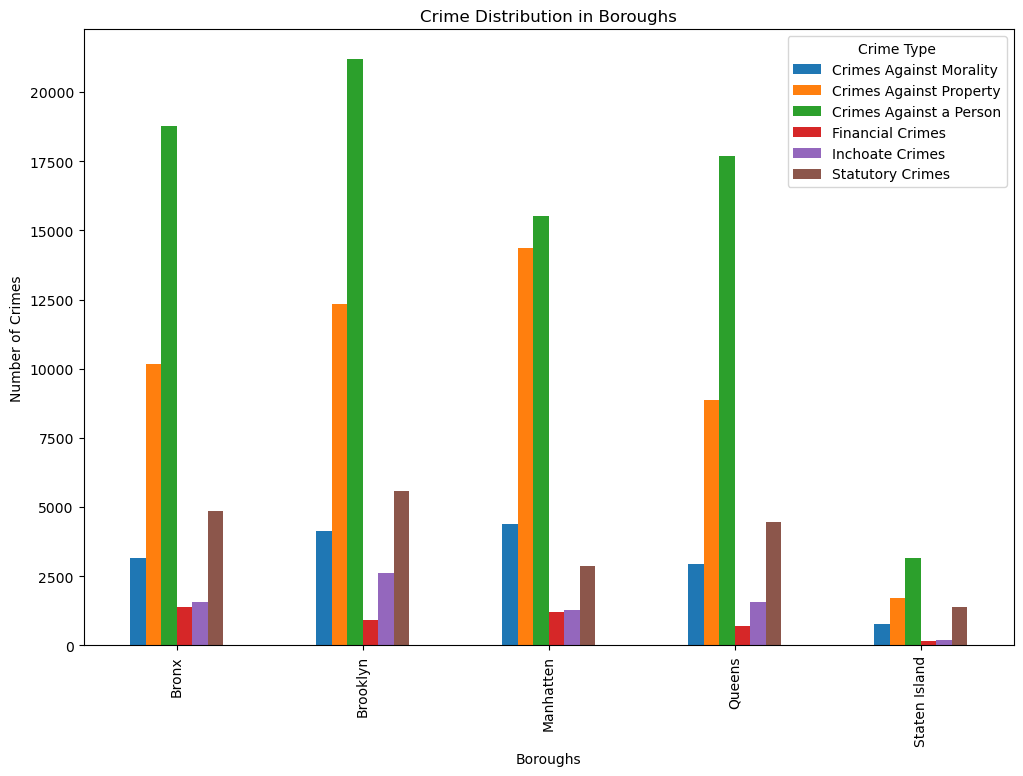

In [42]:
#-------------------------------
# Grouped all categories sums within their respective boroughs 
#-------------------------------

crime_pivot = clean_arrest_count.pivot(index='Borough', columns='OFNS_DESC', values='Arrest Count')

#-------------------------------
# Created a bar chart that shows all the crime category sums by borough 
#-------------------------------
crime_pivot.plot(kind='bar', figsize=(12, 8))
plt.title('Crime Distribution in Boroughs')
plt.xlabel('Boroughs')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1))
plt.savefig('Resources/NYC_Crime_dist.png', bbox_inches='tight')
plt.show()

In [33]:
#-------------------------------
# Created Facility count dataframe, grouped by borough, and renamed a few columns 
#-------------------------------

MentFac_df.borough.unique()
MentFac_df['borough'] = MentFac_df['borough'].replace(['Manhattan'], ['Manhatten'])
Grouped_MentFac_df = MentFac_df.groupby('borough')
Grouped_MentFac_count = Grouped_MentFac_df.size()
MenFac_count_df = Grouped_MentFac_count.reset_index(name='Facility Count')
MenFac_count_df = MenFac_count_df.rename(columns={'borough':'Borough'})
MenFac_count_df.head()

,Borough,Facility Count
0,Bronx,9
1,Brooklyn,19
2,Manhatten,33
3,Queens,14
4,Staten Island,3


In [34]:
merged_df = pd.merge(MenFac_count_df, clean_arrest_count, on='Borough', how='outer')
merged_df.head()

,Borough,Facility Count,OFNS_DESC,Arrest Count
0,Bronx,9,Crimes Against Morality,3152
1,Bronx,9,Crimes Against Property,10166
2,Bronx,9,Crimes Against a Person,18786
3,Bronx,9,Financial Crimes,1382
4,Bronx,9,Inchoate Crimes,1588


The r-squared is: 0.05473956549922081


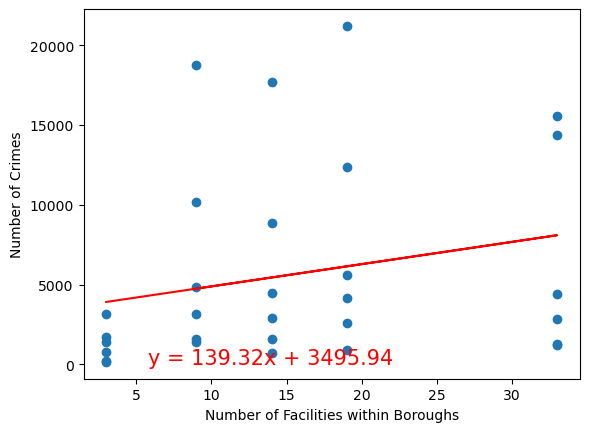

In [44]:
from scipy import stats





x_values = merged_df['Facility Count']
y_values = merged_df['Arrest Count']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Number of Facilities within Boroughs')
plt.ylabel('Number of Crimes')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Resources/arrest_fac_corr.png')
plt.show()

The r-squared is: 0.05473956549922081


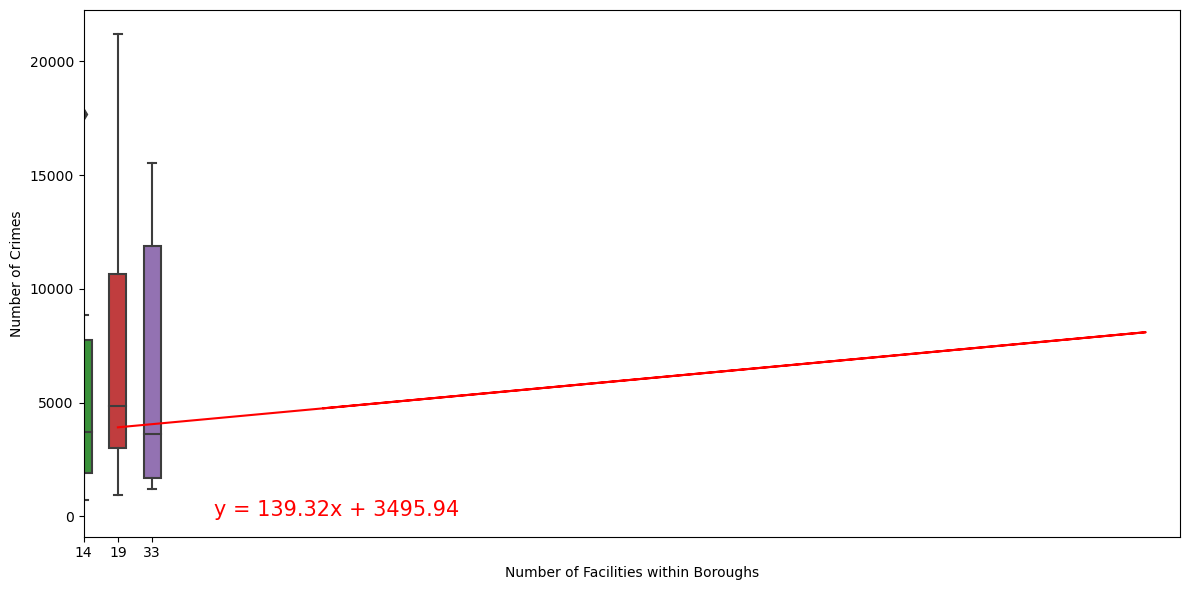

In [49]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_df['Facility Count'], y=merged_df['Arrest Count'], width=0.5)  # Adjust width as needed
plt.xlabel('Number of Facilities within Boroughs')
plt.ylabel('Number of Crimes')

# Regression line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_values, regress_values, "r-", label=line_eq)


# Annotation
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")

# R-squared value
print(f"The r-squared is: {rvalue**2}")

# Set x-axis limits based on data
plt.xlim(merged_df['Facility Count'].min() - 1, merged_df['Facility Count'].max() + 1)

# Save and show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()